 ## Matplotlib 数据可视化

 `Matplotlib` 是 `Python` 中最流行的数据可视化库. 它允许我们创建图表, 并且使得生成矢量文件非常容易, 而无需 `GPU` 本章主要介绍 `Matplotlib` 在数据可视化的操作. 

# 目录

1. [安装Matplotlib](#1)

2. [Matplotlib 常用技巧](#2)

3. [两种画图接口](#3)

4. [简易的线形图](#4)

5. [简易的散点图](#5)

6. [可视化异常处理](#6)

7. [密度图与等高线图](#7)

8. [频次直方图、数据区间划分和分布密度](#8)

9. [配置图例](#9)

10. [配置颜色条](#10)

11. [多子图](#11)

12. [文字与注释](#12)

13. [自定义坐标轴刻度](#13)

14. [Matplotlib自定义:配置文件与样式表](#14)

15. [三维图可视化](#15)




### 安装 Matplotlib 

如果你有 `Anaconda`，你可以简单地使用你的终端或命令提示符安装 `Matplotlib`：

`conda install matplotlib`

如果您的计算机上没有Anaconda，请使用以下命令从终端安装Matplotlib：

`pip install matplotlib`

### Matplotlib 常用的技巧

+ 导入 `Matplotlib` 的常用简写形式

In [140]:
import matplotlib.pyplot as plt

`plt` 是常用接口.

+ 设置绘图样式

使用 `plt.style` 来选择图形的绘图风格, 比如选择 `classic` 风格, 这样可以画出的图就是经典的 `Matplotlib` 风格.

In [141]:
plt.style.use('classic')

`Matplotlib` 在 `1.5` 版本之后开始支持不同的风格列表, `(stylesheets)`; 较低的版本只能使用默认的绘图风格.

+ 用不同的 `show()` 如何显示图形


    1.在脚本中画图    

如果在一个脚本文件中, 那么显示图形必须使用 `plt.show()`.

例如, 一个　`myplot.py` 的文件, 代码如下:
```
# -------- file:myplot.py--------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1)
plt.plot(x,y2)


plt.show()
```
在命令行工具执行这个脚本.

`$ python3 myplot.py`

**注意:** 一个 `Python` 会话`(session)` 只能使用一次 `plt.show()` 因此通常把它放在脚本的最后.

    2.在 IPython shell 中画图
    
`IPython` 中交互使用 `Matplotlib` 画图非常方便, 在启动 `Ipython` 后需要使用 `%matplotlib` 魔法命令.

```
%matplotlib

import matplot.pyplot as plt
```

之后任何 `plt` 命令都会自动打开一个图形窗口, 增加新的命令, 图形会自动更新. 特别的有一些变化(例如改变已经画好的线条属性)不会自动及时更新, 可以使用, `plt.draw()` 强制更新. 即启动 `Matplotlib` 模式后不需要使用 `plt.show()`

    3.在 IPython Notebook 中画图    

In [142]:
# 在 Notebook 中启动交互式图形

%matplotlib notebook

In [143]:
# 在 Notebook 中启动静态图

%matplotlib inline

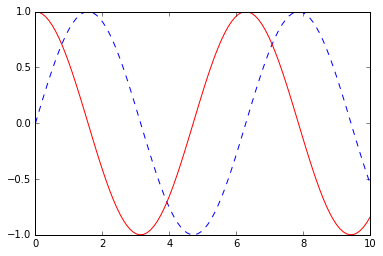

In [144]:
import numpy as np
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x,np.sin(x),'--')
plt.plot(x,np.cos(x),'red')

    4.将图形保存成文件
    
Matplotlib生成高质量的图形并将其保存为多种格式，例如png，jpg，svg，pdf等。使用`.savefig（）`方法，我们将上图保存在文件夹中名为`my_figure.png`：

`fig.savefig(‘my_figure.png’)`

可以通过 `canvas` 对象的方法来查看系统支持的文件格式

In [145]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

基于 `Notebook` 中的画图, 保存图片

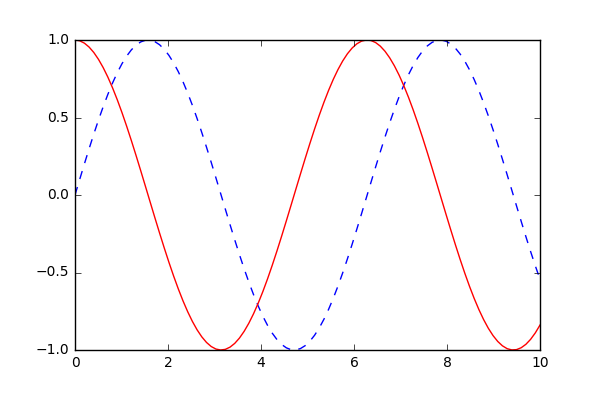

In [146]:
fig.savefig('my_figure.png')

# 可以调用 IPython 的 Image 对象来显示文件内容

from IPython.display import Image
Image('my_figure.png')

### 两种画图接口


+ Matlab 风格接口

> 和　Ｍatlab 很多语法相似, 这种接口最重要的特性是有状态,　它会持续跟踪当前图形和坐标轴,　所有的 `plt` 命令都可以用.可以使用 `plt.gcf()` 和 `plt.gca()` 获取当前的图形和当前的轴.

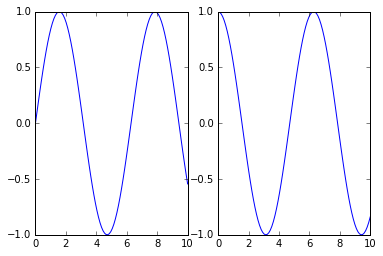

In [147]:
plt.figure() # 创建图形

# 创建两个子图中的第一个, 设置坐标轴
plt.subplot(1,2,1) # （行, 列, 子图编号）
plt.plot(x,np.sin(x))

# 创建两个子图中的第一个, 设置坐标轴
plt.subplot(1,2,2) # （行, 列, 子图编号）
plt.plot(x,np.cos(x))

plt.show() # 显示图形

+ 面向对象接口

这是创建图的最佳方式。 这里的想法是创建图对象并将其关闭. 可以适用更复杂的场景, 

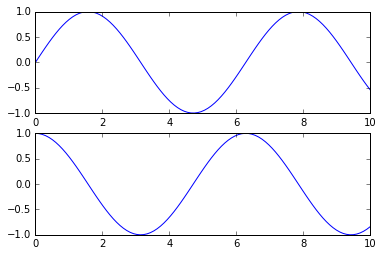

In [148]:
# 先创建图形网格
# ax 是一个包含两个 Axes 对象的数组, 

fig,ax = plt.subplots(2)

# 在每个对象上调用 plot() 方法

ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

### 简易线形图

+ 最简单的是 线性方程 $y=f(x)$ 的可视化. 首先导入下面的命令.

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np 

画 `Matplotlib` 图时, 首先创建一个图形, `fig` 和一个坐标轴 `axes`, 

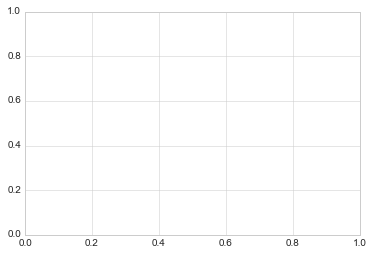

In [150]:
fig = plt.figure()
axes = plt.axes()

在 `Matplotlib` 里面, `plt.figure() 类的一个实例` 可以看作是一个能够容纳各种坐标轴、图形、文字、刻度和标签的容器, `plt.axes()类的一个实例` 是一个带有刻度和标签的矩形.  

创建好坐标轴之后, 就可以用　`axes.plot()` 画图

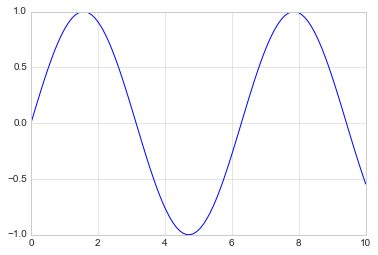

In [151]:
fig = plt.figure()
axes = plt.axes()

x = np.linspace(0,10,100)
axes.plot(x,np.sin(x))

+ 调整图形: 线条的颜色与风格

`plt.plot()` 函数可以通过相应的参数设置颜色和风格.可以使用 `help(plt.plot())` 查看参数.

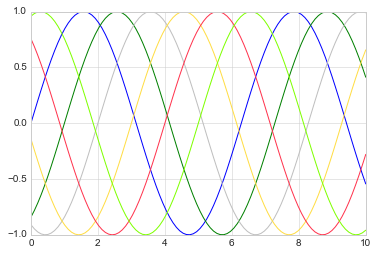

In [152]:
plt.plot(x,np.sin(x-0),color='blue') # 标准颜色名称
plt.plot(x,np.sin(x-1),color='g') # 缩写颜色代码 rgbcmyk
plt.plot(x,np.sin(x-2),color='0.75') # 范围在 0~1 之间的灰度值.
plt.plot(x,np.sin(x-3),color='#FFDD44') # 十六进制 (RRGGBB,00~FF)
plt.plot(x,np.sin(x-4),color=(1.0,0.2,0.3)) # RGB元组,范围 0~1
plt.plot(x,np.sin(x-5),color='chartreuse') # HTML 颜色名称


如果不指定颜色,　`Matplotlib` 会为多条线自动循环使用一条默认的颜色.也可以使用　`linestyle` 调整线的风格.　 

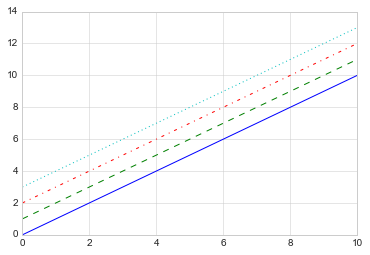

In [153]:
plt.plot(x,x+0,linestyle='solid')
plt.plot(x,x+1,linestyle='dashed')
plt.plot(x,x+2,linestyle='dashdot')
plt.plot(x,x+3,linestyle='dotted')

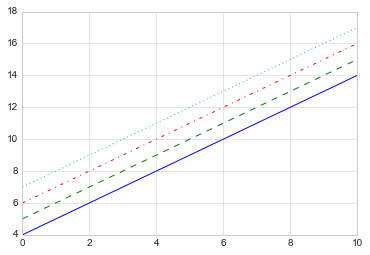

In [154]:
# 也可以使用下面的简写风格

plt.plot(x,x+4,linestyle='-') # 实线
plt.plot(x,x+5,linestyle='--') # 虚线
plt.plot(x,x+6,linestyle='-.') # 点划线
plt.plot(x,x+7,linestyle=':') # 实点线

如果想用更简单的方式, 可以将 `linestyle` 和 `color` 编码组合起来, 作为 `plt.plot()` 函数的一个非关键字参数使用.

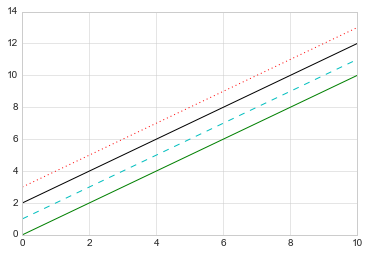

In [155]:
plt.plot(x,x+0,'-g')# 绿色实线
plt.plot(x,x+1,'--c')# 青色虚线
plt.plot(x,x+2,'-k')# 黑色点划线
plt.plot(x,x+3,':r')# 红色实点线

+ 调整图形:坐标轴上下限

`Matplotlib` 可以自动为图形选择合适的坐标轴上下限,　但是有时需要自定义坐标轴. 调整坐标轴上下限的基础方法是 `plt.xlim()` 和 `plt.ylim()`.

(-1.5, 1.5)

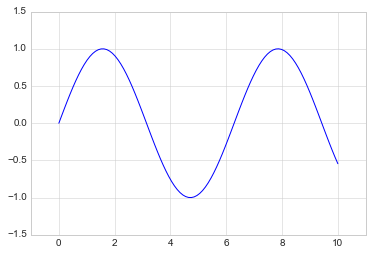

In [156]:
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))

plt.xlim(-1,11)
plt.ylim(-1.5,1.5)

如果想要坐标轴逆序显示, 也可以逆序设置坐标轴刻度.

(1.2, -1.2)

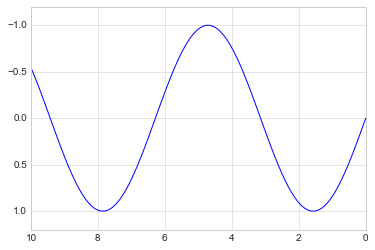

In [157]:
plt.plot(x,np.sin(x))

plt.xlim(10,0)
plt.ylim(1.2,-1.2)

还有一个方法, `plt.axis()` 通过传入 `[xmin,xmax,ymin,ymax]` 对应的值.

[-1, 11, -1.5, 1.5]

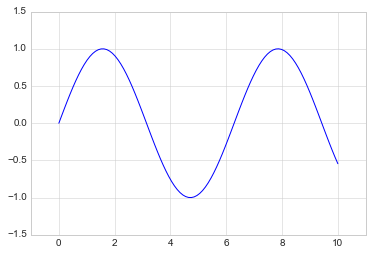

In [158]:
plt.plot(x,np.sin(x))
plt.axis([-1,11,-1.5,1.5])

`plt.axis()` 还可以按照图形内容自动收紧坐标轴,不留空白区域.

(0.0, 10.0, -0.99938455761243572, 0.9996923408861117)

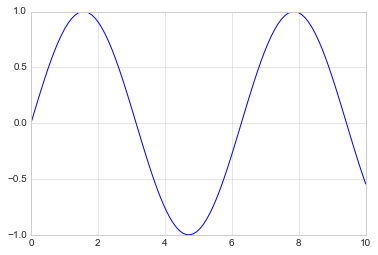

In [159]:
plt.plot(x,np.sin(x))
plt.axis('tight')

图形显示在屏幕上 1:1, x 轴单位长度与 y 轴单位长度相等

(0.0, 10.0, -1.0, 1.0)

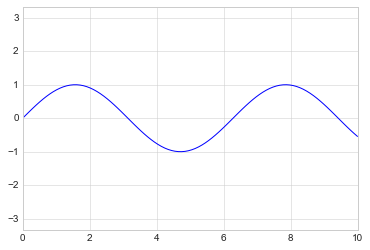

In [160]:
plt.plot(x,np.sin(x))
plt.axis('equal')

`plt.axis()` 方法的其它功能, `help(plt.axis())` 方式查询帮助文档.

+ 设置图形的标签


设置图形的标签包括,　图形标题, 坐标轴标题, 简易图例.

Text(0,0.5,'sin(x)')

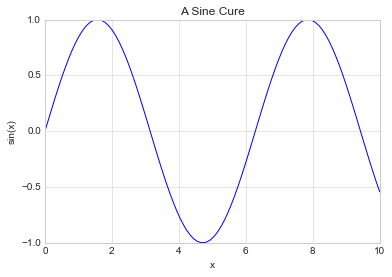

In [161]:
plt.plot(x,np.sin(x))
plt.title('A Sine Cure')
plt.xlabel('x')
plt.ylabel('sin(x)')

可以通过优化参数来调整这些标签的位置、大小和风格.　

在单个坐标轴上显示多条图形时, 可以创建图例.

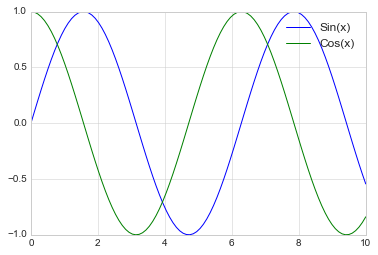

In [162]:
plt.plot(x,np.sin(x),label='Sin(x)')
plt.plot(x,np.cos(x),label='Cos(x)')

plt.legend()

**补充:** 一些 Matlab 风格的方法和面向对向方法的转换
```
> plt.xlabel()--->ax.set_xlabel()

> plt.ylabel()--->ax.set_ylabel()

> plt.xlim()--->ax.set_xlim()

> plt.ylim()--->ax.set_ylim()

> plt.title()--->ax.set_title()
```

在面向对象接口画图时, 不需要单独调用这些函数, 通常采用 `ax.set()` 方法一次性设置所有的属性.

[(-2, 2),
 Text(0,0.5,'Sin(x)'),
 (0, 10),
 Text(0.5,0,'x'),
 Text(0.5,1,'A Sin Cure')]

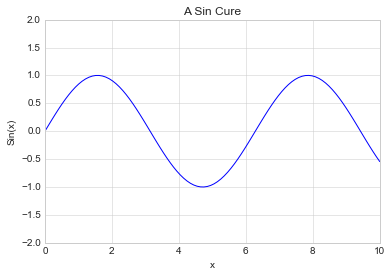

In [163]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),xlabel='x',ylabel='Sin(x)',title='A Sin Cure')

### 简易的散点图

另一种常用的图形是散点图`scatter plot`, 这种图形与线性图类似,　这种图不在用线段连接, 而是由独立的点,　圆圈、或其它形状构成, 

+ 用 `plt.plot` 画散点图

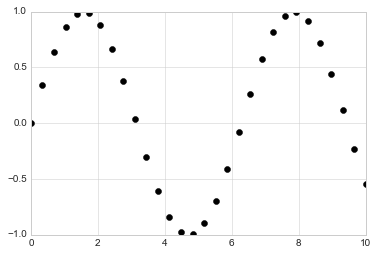

In [164]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color='black')

函数的第三个参数是一个字符,　表示图形符号类型,　与之前用的 `-` 和 `--` 设置线条属性类似. 其缩写都可以在 `plt.plot` 的帮助文档中查到.绝大部分图形标记非常直观.这里我们演示一部分.

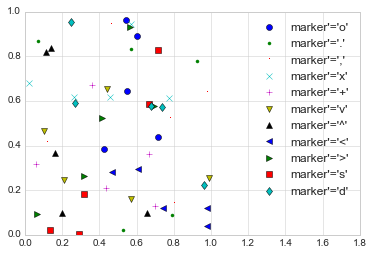

In [165]:
rng = np.random.RandomState(0)
for marker in ['o', '.',',','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5),rng.rand(5),marker,label="marker'='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0,1.8)

这些代码可以与线条、颜色代码组合起来, 画出一条连接散点图.

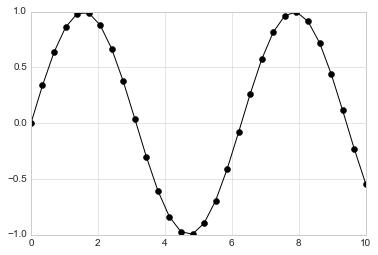

In [166]:
plt.plot(x,y,'-ok') # 直线 -,圆圈 o, 黑色　k

另外, `plt.plot` 支持许多设置线条和散点属性的参数.

(-1.2, 1.2)

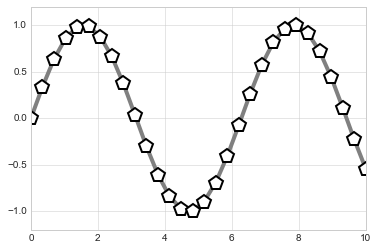

In [167]:
plt.plot(x,y,'-p',color='gray',
        markersize=15,linewidth=4,
        markerfacecolor='white',
        markeredgewidth=2)
plt.ylim(-1.2,1.2)

**补充:** `plt.plot` 函数非常灵活, 请参考 `plt.plot` 帮助文档.

+ 用 `plt.scatter` 画散点

另外一个创建散点图的函数是 `plt.scatter`. 它的功能十分强大, 与`plt.plot` 非常类似.

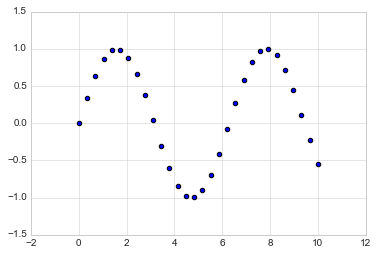

In [168]:
plt.scatter(x,y,marker='o')

`plt.scatter` 与 `plt.plot` 的主要差别在于, 前者在创建散点图时具有更高的灵活性, 可以单独控制每个散点与数据匹配, 也可以让每个散点具有不同的属性, (大小, 表面颜色, 边框颜色).

下面创建一个随机的散点图, 里面有各种大小和颜色的散点, 为了更好的显示重叠部分 用 `alpha` 参数来调整透明度.

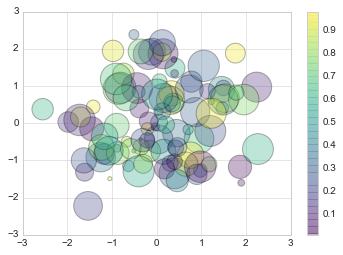

In [169]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)

sizes = 1000*rng.rand(100)

plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar() # 显示颜色条

+ `plot` 与 `scatter` 效率上的比较

当数据集较小的时候, 两者的效率差异不大, 当面对大量的数据时, `plt.plot` 方法比`plt.scatter` 方法较好, 这是因为`plt.scatter` 会对每个点进行单独的大小与颜色渲染, 这样会消耗更多的资源.

### 可视化异常处理

准确衡量数据误差都是是无比重要的, 在数据可视化的结果中用图形将误差有效的显示出来, 就可以提供更充分的信息.

+ 基本误差线

基本误差线 `errorbar` 是可以通过一个 Matplotlib 函数创建

<ErrorbarContainer object of 3 artists>

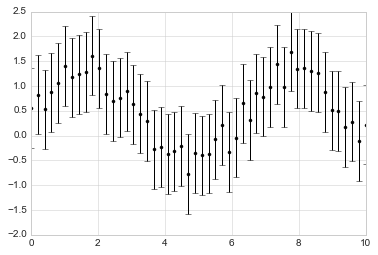

In [170]:
x = np.linspace(0,10,50)
dy = 0.8

y = np.sin(x)+dy*np.random.rand(50)

plt.errorbar(x,y,yerr=dy,fmt='.k')

其中, `fmt` 是一种控制线条和点的外观代码格式, 语法与 `plt.plot` 的缩写代码相同.

除了基本的选择之外, `errorbar` 还有许多可以改善的选项.可以通过这些额外的选项, 你可以轻松自定义误差线图形的绘画风格.一般来说, 让误差线的颜色比数据的颜色浅一点效果会非常好.

<ErrorbarContainer object of 3 artists>

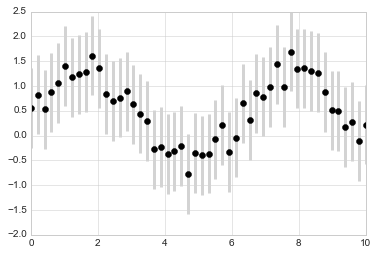

In [171]:
plt.errorbar(x,y,yerr=dy,fmt='o',color='black',ecolor='lightgray',elinewidth=3,capsize=0)

除了这些选项之外，你还可以设置水平方向误差线 `xerr`, 单侧误差线 `one-sidederrorbar` 以及其它形式的误差线,请查　`plt.errorbar`.

+ 连续误差

有时候显示的是连续变量的误差, 可以通过 `plt.plot` 和 `plt.fill_between` 来解决.

将用 `Scikit-learn` 程序库 `API` 里面一个简单的`高斯过程回归方法`来演示.

In [172]:
from sklearn.gaussian_process import GaussianProcess

# 定义模型和要画的数据

model = lambda x: x*np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

# 计算高斯过程拟合结果

gp = GaussianProcess(corr='cubic',theta0=1e-2,thetaL=1e-4,thetaU=1e-1,random_start=100)

gp.fit(xdata[:,np.newaxis],ydata)
xfit = np.linspace(0,10,1000)
yfit, MSE = gp.predict(xfit[:,np.newaxis],eval_MSE=True)
dyfit = 2*np.sqrt(MSE) # 2*sigma~95% 置信区间

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_mode

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated i

现在获得了 `xfit`, `yfit` 和　`dyfit` 表示数据连续拟合的结果, 把这些数据传到 `plt.errorbar` 函数, 但是不要真的以为 1000 个数据点画上 1000 个误差线, 可以通过 `plt.fill_between` 函数中设置颜色来表示连续的误差线.


(0, 10)

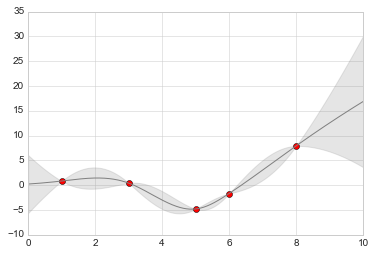

In [173]:
# 将结果可视化

plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')

plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,color='gray',alpha=0.2)

plt.xlim(0,10)

`plt.fill_between` 函数首先传入　`x` 轴坐标值,　然后传入 `y` 轴下边界,以及 `y` 轴上边界, 从图中可以非常直观地看出高斯过程回归方法拟合的效果, 在接近样本点的区域模型受到很强的约束, 拟合误差非常小, 非常接近真实值, 而在远离样本点区域模型不受约束, 误差 不断增大.

关于更多的　`plt.fill_between` 查询其文档.

### 密度图与等高线图

二维图上用等高线或者彩色图来表示三维数据, 这里提供了三个函数来解决这个问题.`plt.contour` 画等高线, `plt.contourf` 画带有填充色的等高线图,　`plt.imshow` 显示图形.

+ 三维函数的可视化

首先 $z=f(x,y)$ 演示一个等高线图, 

In [174]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

等高线图可以用 `plt.contour` 函数来创建,　它需要三个参数, `x` 轴, `y` 轴, `z` 轴 三个坐标轴的的网格数据, `x` `y` 表示图形中的位置, `z` 轴将通过等高线的等级来表示.

用 `np.meshgrid` 函数来准备这些数据.　

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


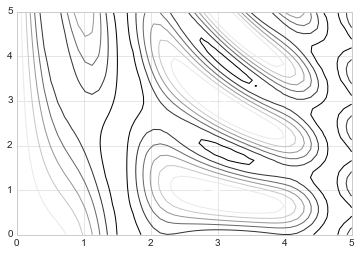

In [175]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

plt.contour(X,Y,Z,color='black')

**注意:** 当图形中只使用一种颜色时, 默认使用虚线表示负数, 使用实数表示正数. 另外可以 `cmap` 参数设置一个线条配色方案来自定义颜色.　还可以用更多的线条显示不同的颜色,　可以将数据等分为 20 份, 然后用不同的颜色表示.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'camp'
  s)


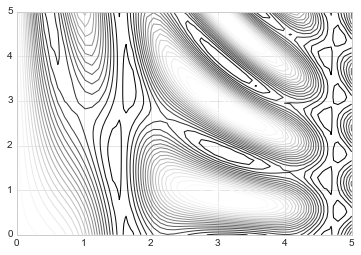

In [176]:
plt.contour(X,Y,Z,20,camp='RdGy')

现在使用 `RdGy` (红-灰) Red-Gray 缩写, 这样对数据集中度的显示效果比较好.`Matplotlib` 有丰富的配色方案,可以使用`IPython` 里的 `Tab` 浏览 `plt.cm` 的信息 

In [177]:
#plt.cm.<TAB>
plt.cm

<module 'matplotlib.cm' from '/usr/local/lib/python3.6/dist-packages/matplotlib/cm.py'>

虽然图形看起来漂亮了, 但是线条之间的间隙比较大, 可以通过 `plt.contourf` 函数来填充等高线图, 它的语法和 `plt.contour()` 是一样的. 

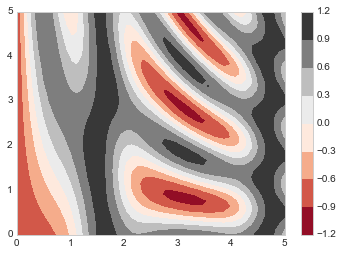

In [178]:
plt.contourf(X,Y,Z,cmap='RdGy')
plt.colorbar()

通过颜色条可以清晰地看到, 黑色区域是波峰, 红色区域是波谷, 图像看起来还是有些污渍,不是那么干净, 则是颜色的改变是一个离散而非连续的过程. 我们可以将等高线的数量设置得非常多来解决, 但是最终获得的图形性能会很不还, 因为 `Matplotlib` 必须渲染每一级的等高线.

这里有更好的做法. `plt.imshow()` 函数来处理.

(0.0, 5.0, 0.0, 5.0)

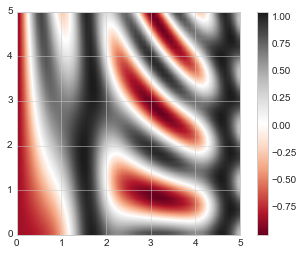

In [179]:
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

使用 `plt.imshow()` 函数需要注意:

+ `plt.imshow() ` 不支持　`x`, `y` 轴数据的设置.而是必须由 `extent` 参数来设置图形的坐标范围, `[xmin,xmax,ymin,ymax]`.
+ `pltimshow()` 默认使用标准的图形数组定义,　就是原点位于左下角, 而不是绝大多数等高线图中使用左下角,　这一点在显示网格数据图时形时必须调整.
+ `plt.imshow()` 会自动调整坐标轴的精度以适应数据显示, 可以使用 `plt.axis('aspect='image')` 来设置 `x`、`y` 轴的单位.

最后还有一个可能用到方法, 就是将等高线与彩色图结合起来, 需要一副背景色半透明的彩色图, (通过 `alpha` 参数来设置透明度). 与另一幅坐标轴相同. 带数据标签的等高线图叠放在一起, 用 `plt.clabel()` 函数实现.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


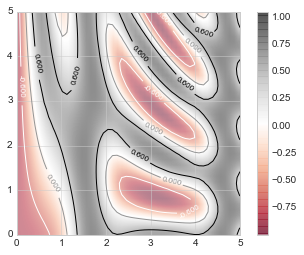

In [180]:
contours = plt.contour(X,Y,Z,3,color='black')
plt.clabel(contours,inline=True,fontsize=8)

plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.5)
plt.colorbar()


`plt.contour`, `plt.contourf`, `plt.imshow` 三个函数组合起来就打开了用二维图画三维数据的无尽可能.更多细节查看相应文档.

### 频次直方图、数据区间划分和分布密度

(array([   3.,   12.,   53.,  107.,  201.,  252.,  215.,  102.,   44.,   11.]),
 array([-3.44057433, -2.80535526, -2.17013618, -1.53491711, -0.89969804,
        -0.26447897,  0.37074011,  1.00595918,  1.64117825,  2.27639732,
         2.9116164 ]),
 <a list of 10 Patch objects>)

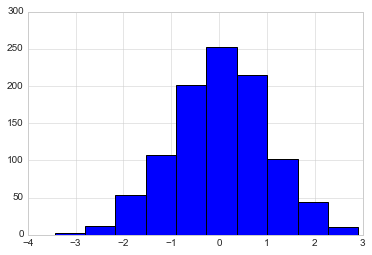

In [181]:
data = np.random.randn(1000)

plt.hist(data)

`plt.hist()` 有许多用来调整计算过程和显示效果的选项, 下面给出更加个性化的例子.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 0.00472278,  0.00944556,  0.        ,  0.00944556,  0.00944556,
         0.03778224,  0.0472278 ,  0.11334672,  0.08973282,  0.08501004,
         0.15585174,  0.26447569,  0.27392125,  0.34004017,  0.33531739,
         0.39671353,  0.44394133,  0.34948573,  0.44866411,  0.29281237,
         0.27392125,  0.22669345,  0.13223784,  0.12279228,  0.08501004,
         0.06139614,  0.06139614,  0.03778224,  0.00472278,  0.00944556]),
 array([-3.44057433, -3.22883464, -3.01709495, -2.80535526, -2.59361556,
        -2.38187587, -2.17013618, -1.95839649, -1.7466568 , -1.53491711,
        -1.32317742, -1.11143773, -0.89969804, -0.68795835, -0.47621866,
        -0.26447897, -0.05273928,  0.15900042,  0.37074011,  0.5824798 ,
         0.79421949,  1.00595918,  1.21769887,  1.42943856,  1.64117825,
         1.85291794,  2.06465763,  2.27639732,  2.48813701,  2.6998767 ,
         2.9116164 ]),
 <a list of 1 Patch objects>)

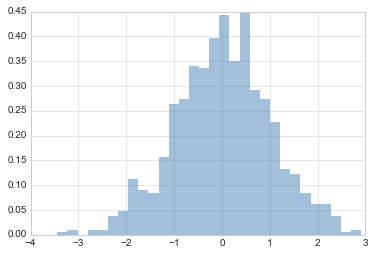

In [182]:
plt.hist(data,bins=30,normed=True,alpha=0.5,histtype='stepfilled',color='steelblue',edgecolor='none')

`plt.hist()` 函数自定义更多的内容可参考帮助文档, 频次直方图对不同分布特征的样本进行对比时, 将 `histype='stepfilled'` 与透明性参数 `alpha` 搭配使用效果非常好.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 0.00319548,  0.        ,  0.00319548,  0.00639096,  0.00319548,
         0.00319548,  0.00639096,  0.01278192,  0.01917287,  0.03195479,
         0.03834575,  0.04154123,  0.0607141 ,  0.08627793,  0.06710506,
         0.12462368,  0.12462368,  0.19811969,  0.18853326,  0.13740559,
         0.21409709,  0.21090161,  0.17575134,  0.17894682,  0.15338299,
         0.14379655,  0.15977395,  0.15018751,  0.1054508 ,  0.14060107,
         0.08627793,  0.09586437,  0.0607141 ,  0.05432314,  0.02236835,
         0.03515027,  0.02236835,  0.00958644,  0.00958644,  0.00958644]),
 array([-3.90521212, -3.59226998, -3.27932784, -2.96638571, -2.65344357,
        -2.34050143, -2.0275593 , -1.71461716, -1.40167502, -1.08873288,
        -0.77579075, -0.46284861, -0.14990647,  0.16303566,  0.4759778 ,
         0.78891994,  1.10186208,  1.41480421,  1.72774635,  2.04068849,
         2.35363062,  2.66657276,  2.9795149 ,  3.29245703,  3.60539917,
         3.91834131,  4.23128345,  4.54422558,  4

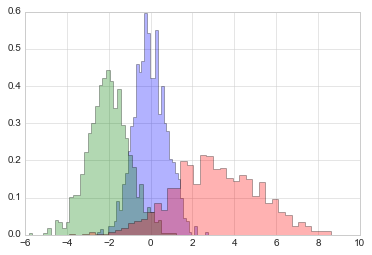

In [183]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled',alpha=0.3,normed=True,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)


只需要简单的计算频次直方图, (就是计算每段区间的样本数) 而并不想画图显示, 那么可以直接使用 `np.histogram()`


In [184]:
counts,bin_edges = np.histogram(data,bins=5)
print(counts)

[ 15 160 453 317  55]


+ 二维频次直方图与数据区间划分

将一维数组分为区间创一维频次直方图, 我们也可以将二维数组按照二维区间进行h划分, 来创建二维频次直方图, 下面介绍几种方法.


用一个多元高斯分布生成 `x` 轴, `y` 轴的样本数据.

In [185]:
mean= [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

1. `plt.hist2d`： 二维频次直方图

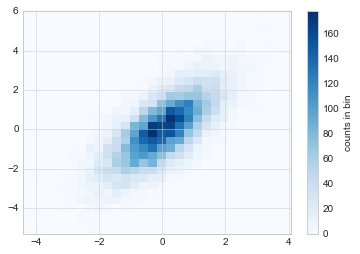

In [186]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

`plt.hist2d` 与 `plt.hist` 类似也有许多调整图形与区间划分的配置选项, 可以查相应文档. 

`plt.hist` 有一个只计算结果不画图的 `np.histogram` 函数, `plt.hist2d` 也类似的有 `np.histogram2d` 函数.

In [187]:
counts, xedges, yedges = np.histogram2d(x,y,bins=30)
print(counts)

[[   1.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   1.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    2.    0.    2.    1.    1.    0.    0.    1.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    2.    1.    1.    2.    0.    1.    

2. `plt.hexbin` 六边形曲面划分

二维频次直方图是由与坐标轴正交的方块分割而成的, 还有一种常用的方式是用正六边形分割. 将二维数据分割成蜂窝状.

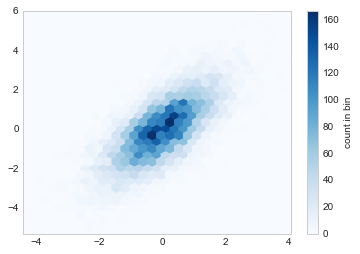

In [188]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb = plt.colorbar(label='count in bin')


`plt.hexbin` 同样也有许多选项参数的配置, 包括每个数据点设置不同的权重, 以及用任意 `NumPy` 累计函数改变每个正六边形区间划分的结果(权重,均值，标准差等指标)

3. 核密度估计

还有一种评估多维数据分布密度常用的方法是核密度估计, 现在演示如何有 `KDE` 方法抹掉空间中离散的数据点, 从而拟合出一个平滑的函数, 在 `scipy.stats` 程序包里面有一种简单快速的 `KDE` 方法实现.

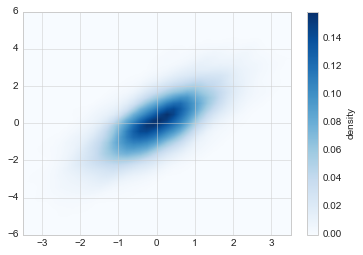

In [189]:
from scipy.stats import gaussian_kde

# 拟合数组维度, [Ndim,Nsample]

data = np.vstack([x,y])

kde = gaussian_kde(data)

# 用一对规则的网格数据进行拟合

xgrid = np.linspace(-3.5,3.5,40)
ygrid = np.linspace(-6,6,40)
Xgrid,Ygrid = np.meshgrid(xgrid,ygrid)

Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

# 画出结果图

plt.imshow(Z.reshape(Xgrid.shape),origin='lower',aspect='auto',extent=[-3.5,3.5,-6,6],cmap='Blues')

cb = plt.colorbar()
cb.set_label('density')

`KDE` 方法通过不同平带宽长度在拟合函数的准确性与平滑性之间做出权衡, `gaussian_kde` 通过一种经验的放法试图找到输入数据平滑长度的急近似最优解. 还有其它的 `KDE` 方法实现.每个版本都有自己的优点.

### 配置图例

可视化图形中使用图例, 可以为不同的图形元素分配标签. 前面介绍了创建简单的图例, 现在介绍在 `Matplotlib` 中自定义图例的位置和艺术风格.

In [190]:
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import numpy as np

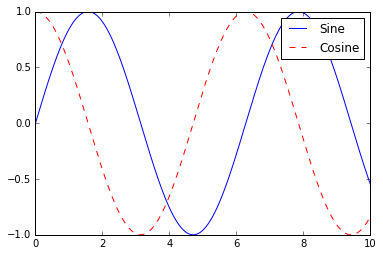

In [191]:
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()

ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
leg = ax.legend() # 默认图例居右有边框

我们经常要对图例进行各种个性化配置, 比如想设置图例的位置, 并取消边框.

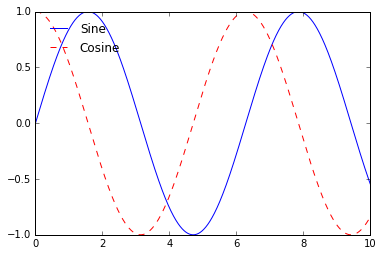

In [192]:
ax.legend(loc='upper left',frameon=False) # 图例居左无边框
fig

还可以用 `ncol` 参数设置图例的标签列数.

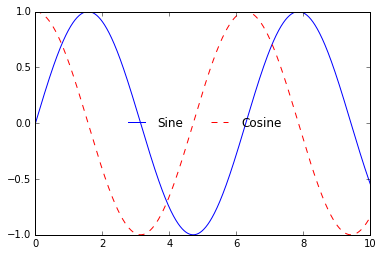

In [193]:
ax.legend(frameon=False,loc='center',ncol=2) # 图例居中, 两列
fig

还可以为图例增加圆角边框, 增加阴影、改变外边框透明度或者改变文字间距.

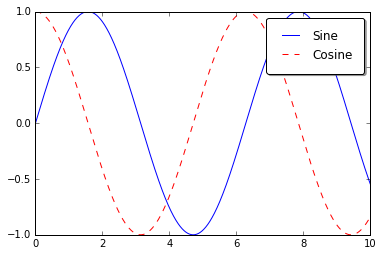

In [194]:
ax.legend(fancybox=True,framealpha=1,shadow=True,borderpad=1) # 加圆角边框, 外边框透明度, 增加阴影,改变文字间距
fig

关于图例的更多配置参考 `plt.legend` 文档.

+ 选择图例的显示元素

图例默认显示所有的元素标签, 如果不想显示全部, 可以通过一些图形命令来指定显示图例中的哪些元素和标签.

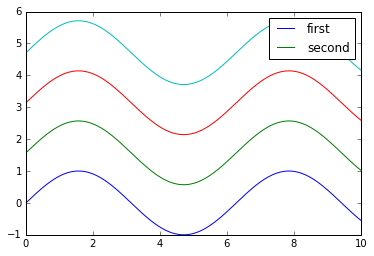

In [195]:
y = np.sin(x[:,np.newaxis]) + np.pi*np.arange(0,2,0.5)
lines = plt.plot(x,y)
# lines 变量是一组 plt.Line2D 实例
plt.legend(lines[:2],['first','second'])

在实现中, 我们发现了一个更清晰的方法,　值为需要在图例中显示的元素设置标签.



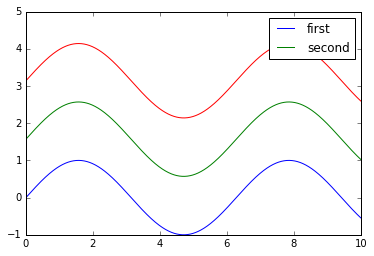

In [196]:
plt.plot(x,y[:,0],label='first')
plt.plot(x,y[:,1],label='second')
plt.plot(x,y[:,2])
plt.legend(framealpha=1,frameon=True)

+ 在图例中显示不同尺寸的点

默认图例仍然不能满足我们的需求, 可能需要不同尺寸的点来表示数据的特征,　并且希望创建这样的图例来反应这些特征.

In [197]:
### 没找到数据集（需要补充）

+ 同时显示多个图例

我们需要在同一张图上显示多个图例,　如果想用 `plt.legend()`　或者 `axlegend()` 方法创建第二个图例, 那么第一个图例会被覆盖, 我们可以从头开始创建一个显得图例,艺术家对象, `legend artist` 然后用底层 `lowerlevel` 的 `ax.add_artist()` 方法在图上添加第二个图例. 

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "upper rifht". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


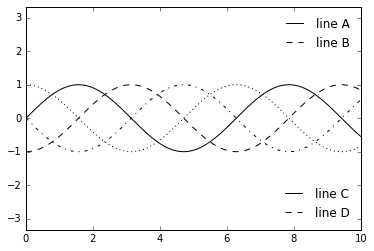

In [198]:
fig,ax = plt.subplots()

lines = []
styles = ['-','--','-.',':']
x = np.linspace(0,10,1000)

for i in range(4):
    lines += ax.plot(x,np.sin(x-i*np.pi/2),styles[i],color='black')
    ax.axis('equal')
    
# 设置第一个图例显示的线条和标签

ax.legend(lines[:2],['line A', 'line B'],loc='upper rifht',frameon=False)

# 创建第二个图例, 通过 add_artist 方法添加到图例上.

from matplotlib.legend import Legend

leg = Legend(ax,lines[:2],['line C','line D'],loc='lower right',frameon=False)
ax.add_artist(leg)

### 配置颜色条

图例通过离散的标签表示离散的图形, 对于图形中由彩色的点、线、面构成的连续标签, 颜色条来表示的效果比较好. 颜色条是独立的坐标轴, 可以指明颜色的含义.

可以使用 `plt.colorbar` 函数就可以创建简单的颜色条.

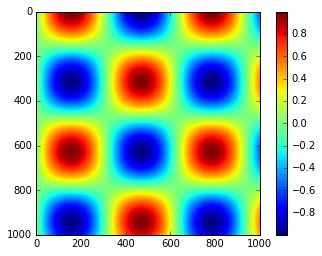

In [199]:
x = np.linspace(0,10,1000)
I = np.sin(x)*np.cos(x[:,np.newaxis])


plt.imshow(I)
plt.colorbar()

+ 配置颜色条

可以通过 `cmap` 参数为图形设置颜色条的配色方案.

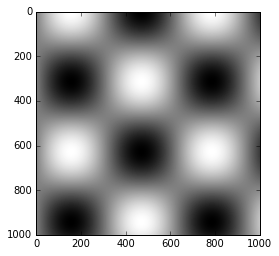

In [200]:
plt.imshow(I,cmap='gray')

所有可用的配色方案 `plt.cm` 命名空间里面, 可以使用 TAB 键补全.

In [201]:
# plt.cm + TAB
plt.cm

<module 'matplotlib.cm' from '/usr/local/lib/python3.6/dist-packages/matplotlib/cm.py'>

+ 选择配色方案

一般情况只需要关注以下的配色方案

> 顺序配色方案

> 互逆配色方案

> 定性配色方案

顺序配色方案: 是由一组连续的颜色构成配色方案

互逆配色方案: 通常由两种互补的颜色构成

定性配色方案: 随机顺序的一组颜色

`jet` 是一种定性配色方案,也是默认的配色方案.

In [202]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    '''
    为配色方案显示灰度图
    '''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 将 RGBA 色转换为不同颜色的灰度值
    # 请参考ｈttp://alienryderflex.com/hsp.html
    RGB_weight = [0.299,0.587,0.114]
    luminance = np.sqrt(np.dot(colors[:,:3]**2,RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray',colors,cmap.N)

In [203]:
def view_colormap(cmap):
    '''
    用等价的灰度图表示颜色的配色方案
    '''
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    
    grayscale = cmap(np.arange(cmap.N))
    
    fig,ax = plt.subplots(2,figsize=(6,2))
    
    ax[0].imshow([colors],extent=[0,10,0,1])
    ax[1].imshow([grayscale],extent=[0,10,0,1])
    

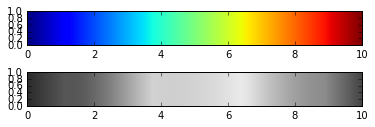

In [204]:
view_colormap('jet')

注意观察灰度图链比较亮的条纹, 这些亮度变化不均匀的条纹在彩色图中对应某一段的彩色区间,　由于彩色太接近容易突显数据集中不重要的部分,导致眼睛无法识别.

使用 `viridis` 是更好的配色方案.

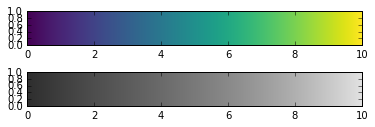

In [205]:
view_colormap('viridis')

如果喜欢彩虹色,　可以使用 `cubehelix` 配色方案来可视化连续数值.

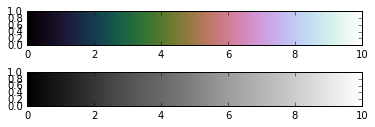

In [206]:
view_colormap('cubehelix')

例如其它的情况,　使用两种正反两种含义时, 可以使用 `RdBu` 双配色方案, (红-蓝)

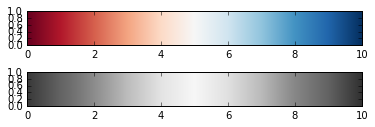

In [207]:
view_colormap('RdBu')

`Matplotlib`里面有更多的配色方案, 在 `IPython` 中使用 `Tab` 键浏览 `plt.cm` 查看相应的文档.

+ 颜色刻度的限制与扩展功能的设置

`Matplotlib` 有丰富的颜色条配置功能, 由于可以将颜色本身仅看作是一个 `plt.Axes` 实例, 因此之前学习的坐标轴、刻度值格式的配置技巧都可以用到.

比如可以缩短颜色取值的上下限, 对于超出上下限的数据, 通过 `extend` 参数用三角箭头表示比上限大的书或者比下限小的数.

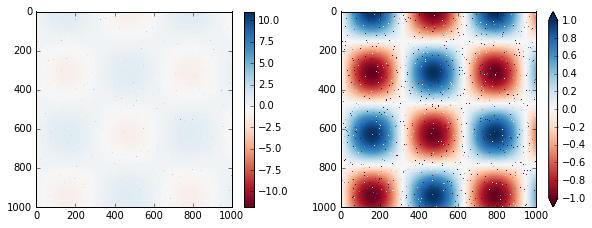

In [208]:
# 为图形像素设置 1% 噪音

speckles = (np.random.random(I.shape)<0.01)
I[speckles] = np.random.normal(0,3,np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(I,cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

> 左图是默认的颜色条刻度实现效果,噪音完全覆盖了数据.

> 右图是设置的颜色条刻度实现效果, 数据的可视化效果比较好.



+ 离散型颜色条



虽然颜色条默认是连续的, 但是有时也需要表示离散的数据.最简单的做法是 `plt.cm.get_cmap()` 函数. 将适当的配色方案名称以及所需要的区间数量传进去即可.

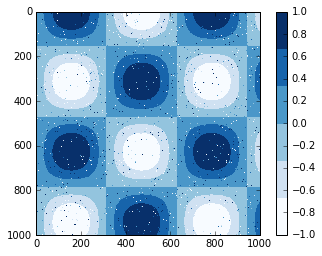

In [209]:
plt.imshow(I,cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,1)

### 多子图

有时需要从多个角度进行对比, `Matplotlib` 为此提出了子图的概念

+ `plt.axes` 手动创建子图

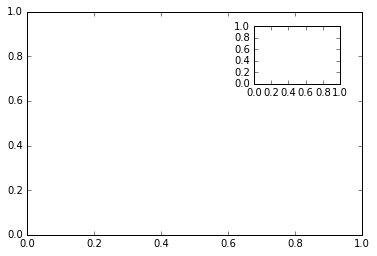

In [210]:
ax1 = plt.axes() # 默认坐标轴
ax2 = plt.axes([0.65,0.65,0.2,0.2]) # 图形高度 0.65,宽度 0.65, 将 x y 扩展到 0.2

面向对象画图接口中类似的命令 `fig.add_axes()` 

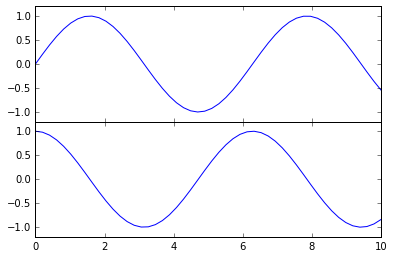

In [211]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4], xticklabels=[],ylim=(-1.2,1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))

x = np.linspace(0,10)
ax1.plot(x,np.sin(x))
ax2.plot(x,np.cos(x))

这样可以看到两个紧挨的子图, 上图的坐标轴没有刻度, 起点 `y` 的坐标为0.5　高度, 下子图 `x` 轴有刻度,　起点　`y` 的坐标 0.1,高度 0.4.

+ `plt.subplot` 简易网格子图

最底层的方法是 `plt.subplot` 在一个网格中创建一个子图.

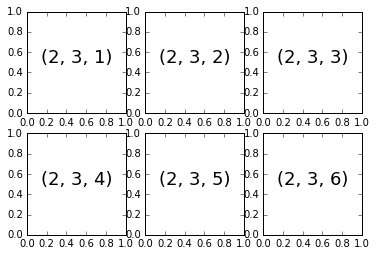

In [212]:
for i in range(1,7):
    plt.subplot(2,3,i) #(行数,列数,索引值)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

`plt.subplots_adjust` 命令可以调整子图之间的间隔,　用面向对象的命令`fig.add_subplot()` 可以取得同样的结果.

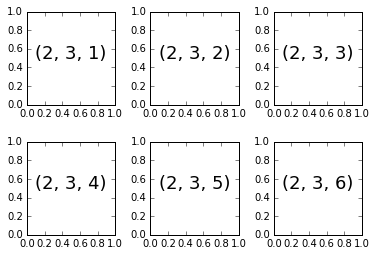

In [213]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')
    

我们通过 `plt.subplots_adjust` 的 `hspace` 和 `wspace` 参数设置与图形高度与宽度一致的子图间距, 数值以子图的尺寸为单位.

`plt.subplots` 用一行代码创建网格.

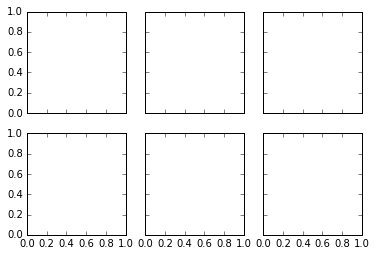

In [214]:
fig, ax = plt.subplots(2,3,sharex='col',sharey='row') # 行数,列数,关键参数 sharex, shanrey

设置 `sharex` `sharey` 可以自动去掉网格内部子图的标签, 让图形看起来更整洁.

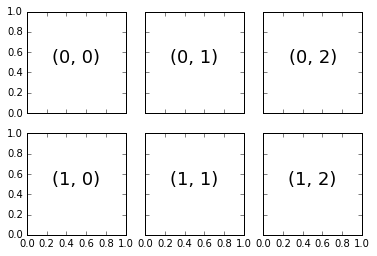

In [215]:
# 坐标轴存放在一个 NumPy 数组中, 按照 [row,col] 

for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=18,ha='center')
fig

与 `plt.subplot()` 相比, `plt.subplots()` 与 `Python` 所以 0 开始的习惯保持一致.

+ `plt.GridSpec` 实现更复杂的排了方式

实现不规则的多行多列的子图网格, `plt.GridSpec()` 是最好的工作.

In [216]:
grid = plt.GridSpec(2,3,wspace=0.4,hspace=0.3)

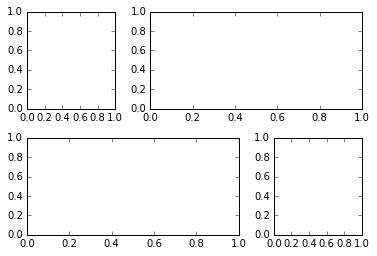

In [217]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

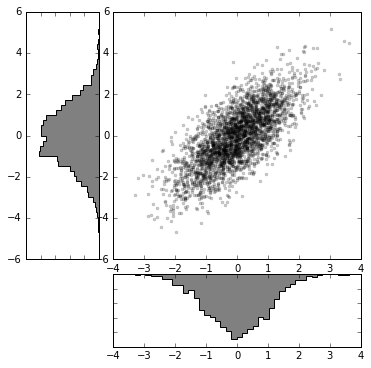

In [218]:
## 创建一些正态分布数据

mean = [0, 0]
cov = [[1, 1],[1, 2]]

x, y = np.random.multivariate_normal(mean, cov,3000).T

# 设置坐标和配置方式

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=0.2,wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

# 主坐标轴上画散点图.

main_ax.plot(x,y,'ok',markersize=3,alpha=0.2)


# 次坐标轴画频次直方图

x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color='gray')

x_hist.invert_yaxis()


y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()

### 文字与注释

一个优秀的可视化作品, 需要辅助少量的文字提示和标签是必不可少的.

可以通过 `plt.text/ax.text` 命令手动的添加注释, 它们可以在具体的 `x、y` 坐标点上放上文字. 

#### 坐标变换与文字位置

一共与三种解决解决这种预定义变换方式

`ax.transData` 以数据为基准的坐标变换.

`ax.transAxes` 以坐标轴为基准的坐标变换(以坐标轴维度为单位)

`fig.transFigure` 以图形为基准的坐标变换, (图形维度为单位)

Text(0.2,0.2,'.Figure(0.2,0.2)')

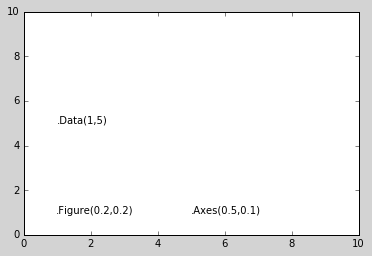

In [219]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# 虽然 transform=ax.transData 是默认值, 但还是设置一下.
ax.text(1,5, '.Data(1,5)', transform=ax.transData)
ax.text(0.5,0.1, '.Axes(0.5,0.1)', transform=ax.transAxes)
ax.text(0.2,0.2, '.Figure(0.2,0.2)', transform=fig.transFigure)

默认情况下, 上面文字在各自的坐标中都是左对齐.


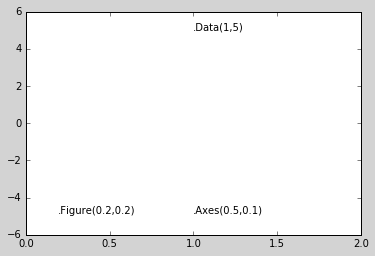

In [220]:
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig

假如改变了坐标轴的上下限, 那么只有 `transData` 坐标轴受影响, 其它坐标系都不变.

#### 箭头与注释

除了刻度线和文字, 简单的箭头也是一种有用的注释标签.

虽然有`pltarrow()` 函数可以实现这个功能, 但是不推荐使用这个, 因为 它创建的箭头是 SVG 向量图对象. 会随着图形分辨率的变化而变化, 推荐常用的 `plt.annotate()` 函数. 

Text(2,-6,'local minimum')

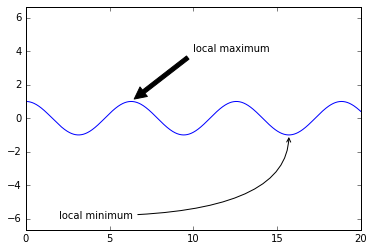

In [221]:
fig, ax  = plt.subplots()

x = np.linspace(0,20,1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1),xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.annotate('local minimum', xy=(5*np.pi, -1),xytext=(2, -6),
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='angle3,angleA=0,angleB=-90'))


### 自定义坐标轴刻度

虽然 `Matplotlib` 默认的坐标轴定位器与格式生成器可以满足大部分的需求, 但并非对每个图合适.

#### 主要刻度和次要刻度

每个坐标轴都有主要刻度线和次要刻度线.

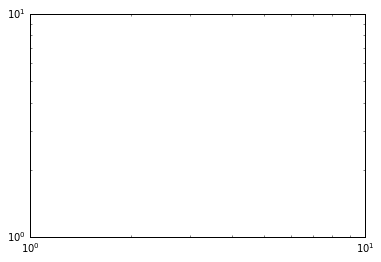

In [222]:
ax = plt.axes(xscale='log', yscale='log')

我们发现每个主要刻度都显示为一个较大的刻度线和标签, 而次要刻度线都显示为一个较小的刻度线, 切不显示标签.

可以通过设置每个坐标轴的 `formatter` 与 `locator` 对象, 自定义刻度属性.

In [223]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [224]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

我们可以发现主要刻度标签和次要刻度标签的位置是通过 `LogLocator` 对象设置的. 

#### 隐藏刻度与标签

`plt.NullLocator` 和 `plt.NullFormatter`可以实现隐藏刻度和标签.

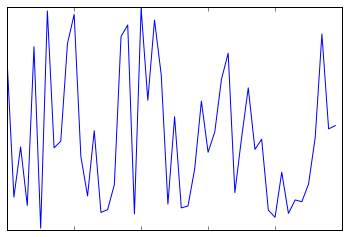

In [225]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

#### 增减刻度数量

默认刻度标签有一个问题, 就是显示较小图形时, 通常刻度显示比较拥挤.

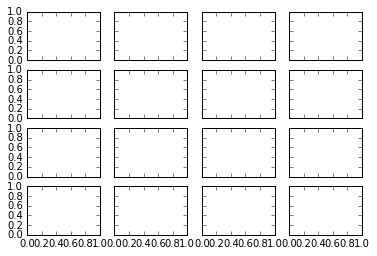

In [226]:
fig, ax = plt.subplots(4,4,sharex=True,sharey=True)

刻度拥挤的图形我们可以 `plt.MaxNLocator()` 来解决这个问题, 可以通过它设置最多需要显示多少刻度.

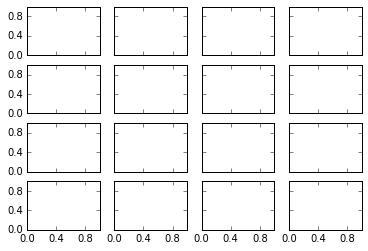

In [227]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
    
fig

#### 花哨的刻度格式

例如, 正余弦曲线

(0, 9.42477796076938)

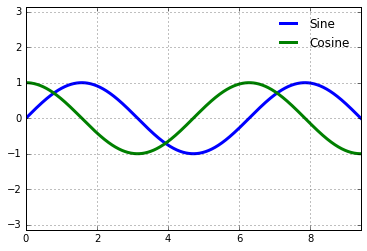

In [228]:
# 画正余弦曲线

fig, ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x, np.sin(x),lw=3,label='Sine')
ax.plot(x, np.cos(x),lw=3,label='Cosine')

# 设置网格图例坐标轴上下限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)

如果我们将刻度与网格线画在 $\pi$ 的倍数上. 可以使用 `MultipleLocator` 来实现.

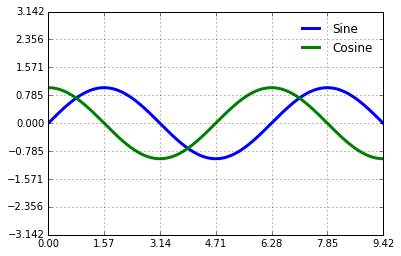

In [229]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi/4))
fig

浙西而刻度虽然已经是 $\pi$ 的倍数, 但是看起来还是很奇怪.

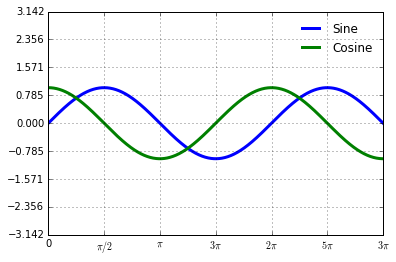

In [230]:
def format_func(value,tick_number):
    # 找到 pi/2 的倍数
    N = int(np.round(2*value/np.pi)) 
    if N == 0:
        return '0'
    elif N==1:
        return r'$\pi/2$'
    elif N==2:
        return r'$\pi$'
    elif N %2>0:
        return r'${0}\pi$'.format(N)
    else:
        return r'${0}\pi$'.format(N//2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig
    

    


#### 格式生成器与定位器小节

|定位器类|描述|
|:------:|:------:|
|NullLocator|无刻度|
|FixedLocator|刻度位置固定|
|IndexLocator|用索引作为定位器|
|LinearLocator|从 $\min$ 到 $\max$ 均匀分布刻度|
|LogLocator|从 $\min$ 到 $\max$ 按对数分布刻度|
|MultipleLocator|刻度和范围都是基数的倍数|
|MaxNLocator|为最大刻度找到最优的位置|
|AutoLocator|以 `MaxNlocator` 进行简单配置|
|AutoMinorLocator|次要刻度的定位器|

|格式生成器类|描述|
|:------:|:------:|
|NullFormatter|刻度上无标签|
|IndexFormatter|将一组标签设置为字符串|
|FixedFormatter|手动为刻度设置标签|
|FuncFormatter|用自定义函数设置标签|
|FormatStrFormatter|为每个刻度值设置字符串格式|
|ScalarFormatter|为标量值设置标签|
|LogFormatter|对数坐标轴默认设置生成器|

### `Matplotlib` 自定义： 配置文件与样式表

#### 手动配置图形

(array([   5.,   19.,   70.,  140.,  246.,  234.,  172.,   79.,   27.,    8.]),
 array([-3.13564017, -2.5117536 , -1.88786703, -1.26398046, -0.64009389,
        -0.01620732,  0.60767925,  1.23156581,  1.85545238,  2.47933895,
         3.10322552]),
 <a list of 10 Patch objects>)

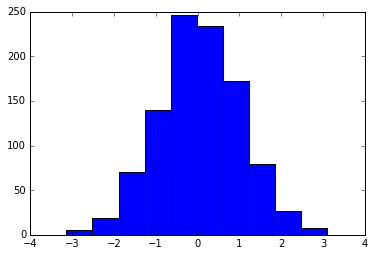

In [231]:
x = np.random.randn(1000)
plt.hist(x)

通过手动调整可以让图形更漂亮.

(array([   5.,   19.,   70.,  140.,  246.,  234.,  172.,   79.,   27.,    8.]),
 array([-3.13564017, -2.5117536 , -1.88786703, -1.26398046, -0.64009389,
        -0.01620732,  0.60767925,  1.23156581,  1.85545238,  2.47933895,
         3.10322552]),
 <a list of 10 Patch objects>)

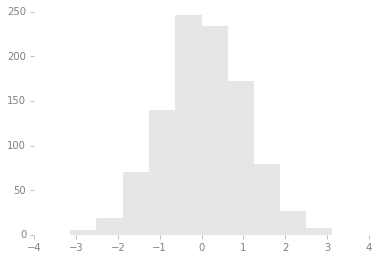

In [232]:

#用灰色颜色
ax = plt.axes()
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴线条
for spine in ax.spines.values():
    spine.set_visible(False)
# 隐藏上边与右边刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
    
# 弱化刻度与标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
# 设置频次直方图轮廓与颜色填充
ax.hist(x, edgecolor='#E6E6E6', color='#E6E6E6')

#### 修改默认配置： rcParams

`plt.rc` 可以随时修改这个配置.

先复制以下目前的 `rcParams` 字典, 这样可以在修改之后还原回来.

In [233]:
IPython_default = plt.rcParams.copy()

In [234]:
from matplotlib import cycler

(array([   5.,   19.,   70.,  140.,  246.,  234.,  172.,   79.,   27.,    8.]),
 array([-3.13564017, -2.5117536 , -1.88786703, -1.26398046, -0.64009389,
        -0.01620732,  0.60767925,  1.23156581,  1.85545238,  2.47933895,
         3.10322552]),
 <a list of 10 Patch objects>)

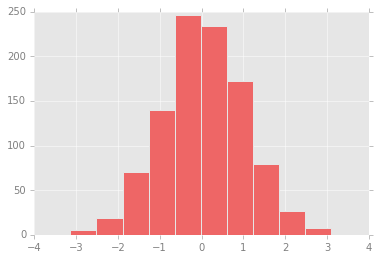

In [235]:
colors = cycler('color',
               ['#EE6666', '#338888', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True,prop_cycle=colors)

plt.rc('grid',color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch',edgecolor='#E6E6E6')
plt.rc('lines',linewidth=2)

plt.hist(x)

再用一些线图看看 `rc` 的效果

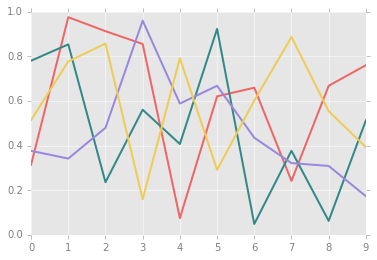

In [236]:
for i in range(4):
    plt.plot(np.random.rand(10))

#### 样式表

通过 `plt.style.available` 命令查看所有的可用风格.

In [237]:
plt.style.available[:]

['seaborn',
 'dark_background',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-bright',
 'classic',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-pastel',
 'fast',
 '_classic_test',
 'seaborn-poster',
 'seaborn-whitegrid',
 'bmh',
 'seaborn-talk',
 'tableau-colorblind10',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'grayscale',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-dark']

In [238]:
# 先创建一个画两种基本图形的函数

def hist_add_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1,2,figsize=(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

+ 默认风格

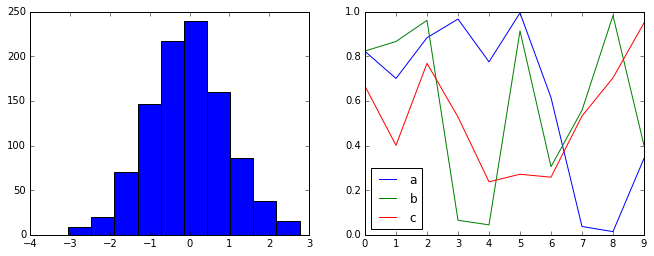

In [239]:
plt.rcParams.update(IPython_default)
hist_add_lines()

+ FiveThirtyRight 风格

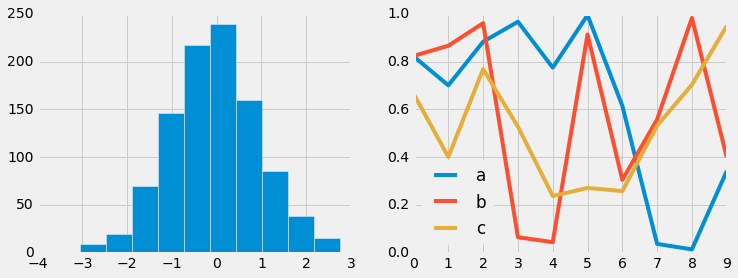

In [240]:
with plt.style.context('fivethirtyeight'):
    hist_add_lines()

+ `ggplot `风格

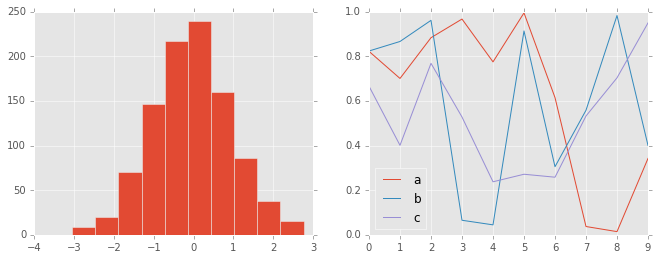

In [241]:
with plt.style.context('ggplot'):
    hist_add_lines()

+ `bmh` 风格

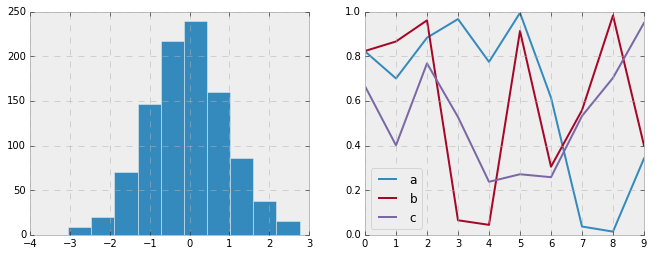

In [242]:
with plt.style.context('bmh'):
    hist_add_lines()

+ 黑色背景风格

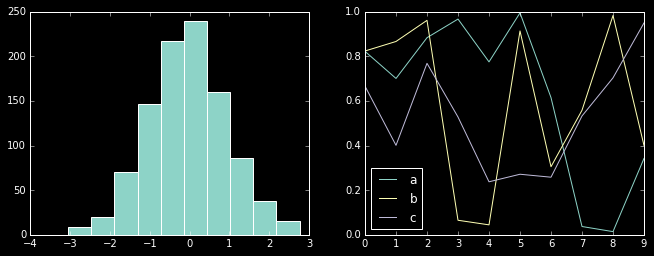

In [243]:
with plt.style.context('dark_background'):
    hist_add_lines()

+ 灰度风格

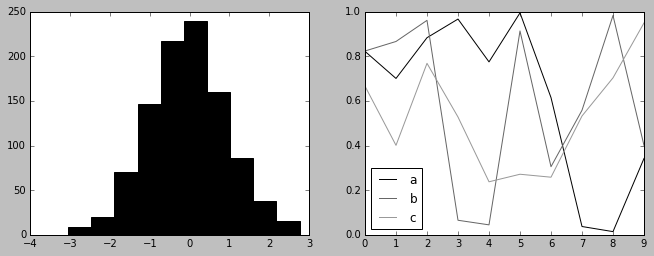

In [244]:
with plt.style.context('grayscale'):
    hist_add_lines()

+ `Seaborn` 风格

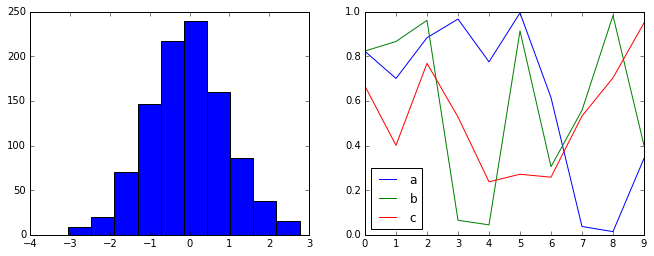

In [245]:
import seaborn

hist_add_lines()

### 用 `Matplotlib` 画三维图

我们可以导入 `Matplotlib` 自带的 `mplot3d` 工具箱来画三维图

In [246]:
from mpl_toolkits import mplot3d

导入这个模块之后就可以创建任意一个普通坐标轴的过程中加入 `projection=3d` 关键字, 从而创建一个三维坐标轴.

In [247]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

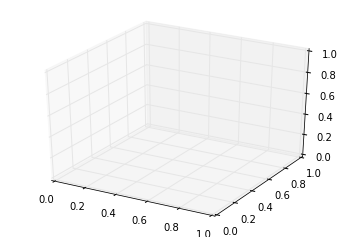

In [248]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#### 三维数据点与线

最基本的三维构图由 `(x,y,z)` 三维坐标点构成的线图与散点图.我们可以用 `ax.plot3D` 与 `ax.scatter3D` 函数来创建.

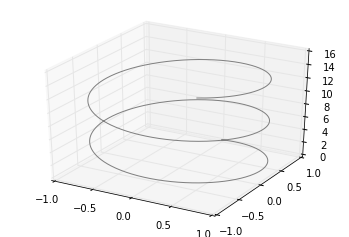

In [249]:
ax = plt.axes(projection='3d')

# 三维线的数据

zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline,yline,zline,'gray')

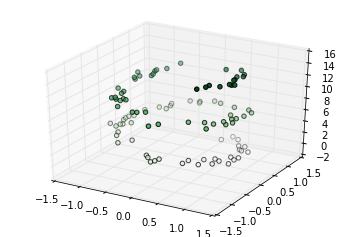

In [250]:
### 三维散点的数据

ax = plt.axes(projection='3d')

zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1*np.random.randn(100)
ydata = np.cos(zdata) + 0.1*np.random.randn(100)
ax.scatter3D(xdata,ydata,zdata,c=zdata,cmap='Greens')

默认情况下散点图会自动改变透明度, 在平面上呈现立体感.

#### 三维等高线图

`mplot3d` 也有同样的输入数据创建三维晕渲图的工具, 与二维 `ax.contour` 类似的一样, 有 `ax.contour3D`, 它要求的所有数据都是二维网格数据的形式, 并由函数计算 `z` 轴的值. 

Text(0.5,0,'z')

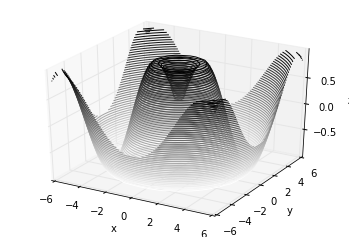

In [251]:
def f(x,y):
    return np.sin(np.sqrt(x**2 +y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

默认的初始观察角度可能不是最优的,`view_init` 可以调整观察角度与方位角, 下面我们把俯视角调整为 60度, 方位角调整为 35度.

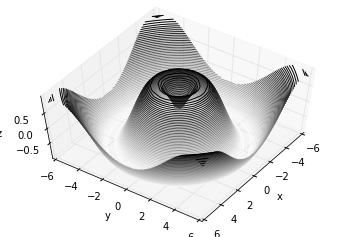

In [252]:
ax.view_init(60, 35)
fig

#### 线框图和曲面图

线框图和曲面图都是将网格数据映射成三维曲面, 得到三维形状非常容易可视化.

Text(0.5,0.92,'wirefame')

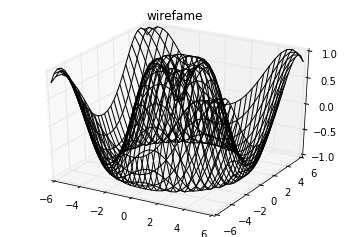

In [253]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wirefame')

曲面图与线框图类似, 只不过线框图的每个面都是由多边形构成, 只要增加一个配色方案来填充这些多边形.

Text(0.5,0.92,'surface')

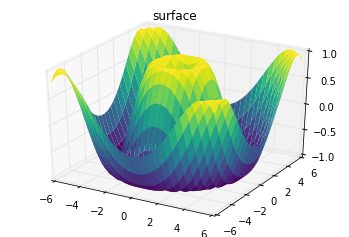

In [254]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface')

曲面画图需要二维数据, 但可以不是直角坐标系(也可以用极坐标), 西面示例创建一个局部的极坐标

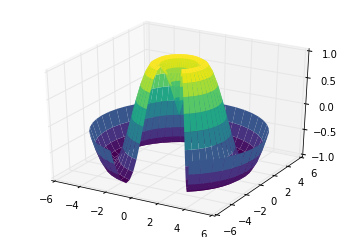

In [255]:
r = np.linspace(0,6,20)
theta = np.linspace(-0.9*np.pi, 0.8*np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r*np.sin(theta)
Y = r*np.cos(theta)
Z = f(X,Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis', edgecolor='none')


#### 曲面三角剖分

上述都是均匀采样网格数据, 当然我们可以用三角剖分图形.

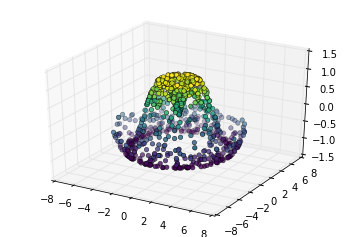

In [256]:
theta = 2*np.pi*np.random.random(1000)
r = 6*np.random.random(1000)
x = np.ravel(r*np.sin(theta))
y = np.ravel(r*np.cos(theta))

def f(x,y):
    return np.sin(np.sqrt(x**2 +y**2))

z = f(x,y)
ax = plt.axes(projection='3d')

ax.scatter(x,y,z,c=z,cmap='viridis', linewidth=0.5)

还有许多地方修补, 可以使用 `ax.plot_trisurf` 函数完成.

ValueError: Argument Z must be 2-dimensional.

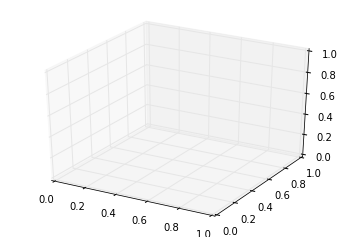

In [257]:
ax = plt.axes(projection='3d')

ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis', edgecolor='none')
